# Individual NN Classification Assignment
Full Name:Vikram Krishnareddy

Student ID :3220965

# Read Data and Import Modules

In [ ]:
!pip install keras

In [ ]:
# import modules
# for general data analysis/plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# for data prep
from sklearn.model_selection import train_test_split

# neural net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [1]:

# Download and Read Dataset


# Install gdown  to download file from Google Drive
!pip -q install gdown

# Download the CalEnviroScreen dataset using the provided file ID
!gdown 1xkU-DBC8iF1X7e02y6h2Sr1OnBe0LAAi

import pandas as pd

# Read the downloaded Excel file into a pandas DataFrame
df = pd.read_excel('CalEnviroScreen.xlsx')

# Print the shape of the dataset
print("Dataset Shape:", df.shape)

# Display the first 10 rows to inspect structure
df.head(10)

Downloading...
From: https://drive.google.com/uc?id=1xkU-DBC8iF1X7e02y6h2Sr1OnBe0LAAi
To: /content/CalEnviroScreen.xlsx
100% 5.08M/5.08M [00:00<00:00, 21.3MB/s]
Dataset Shape: (8035, 57)


,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.090246,100.000000,95-100% (highest scores),...,77.509665,76.3,97.121307,17.6,91.724838,26.0,79.398324,92.120494,9.553509,99.697314
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.677839,99.987388,95-100% (highest scores),...,96.253833,72.5,94.632307,12.3,71.823836,34.1,93.754760,87.436849,9.067784,98.108210
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.970036,99.974776,95-100% (highest scores),...,78.389548,86.8,99.560025,16.1,87.980708,40.1,97.854785,94.581328,9.808714,99.987388
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.491521,99.962164,95-100% (highest scores),...,75.136648,61.3,85.568825,19.6,94.973981,21.1,63.544047,86.701266,8.991499,97.717241
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.030814,99.949552,95-100% (highest scores),...,73.723504,66.4,90.232558,18.6,93.654017,28.1,83.980706,80.075199,8.304332,92.760752
5,6037204920,2598,Los Angeles,90023,Los Angeles,-118.197497,34.017500,80.726872,99.936940,95-100% (highest scores),...,89.148114,66.4,90.232558,11.6,67.419723,22.0,67.034780,82.361214,8.541407,94.892168
6,6077000300,2396,San Joaquin,95203,Stockton,-121.302072,37.952421,80.178935,99.924328,95-100% (highest scores),...,92.401013,76.2,97.033312,14.4,82.002792,24.3,74.727088,91.940147,9.534806,99.646866
7,6019001000,4106,Fresno,93706,Fresno,-119.804314,36.697751,80.134819,99.911716,95-100% (highest scores),...,76.576456,74.5,95.901948,20.0,95.494352,31.8,90.720995,93.793697,9.727032,99.911716
8,6037206050,2146,Los Angeles,90023,Los Angeles,-118.224453,34.029904,79.025293,99.899105,95-100% (highest scores),...,97.120384,75.7,96.643620,28.5,99.505013,31.7,90.555979,80.249569,8.322415,92.962543
9,6019000400,6343,Fresno,93721,Fresno,-119.776209,36.727656,78.529850,99.886493,95-100% (highest scores),...,71.350487,83.4,99.082338,23.5,98.273893,23.2,71.337903,83.195409,8.627918,95.711943


In [2]:

#  Inspect Data Types and Missing Values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Census Tract                                      8035 non-null   int64  
 1   Total Population                                  8035 non-null   int64  
 2   California County                                 8035 non-null   object 
 3   ZIP                                               8035 non-null   int64  
 4   Nearby City 
(to help approximate location only)  8035 non-null   object 
 5   Longitude                                         8035 non-null   float64
 6   Latitude                                          8035 non-null   float64
 7   CES 3.0 Score                                     7929 non-null   float64
 8    CES 3.0 Percentile                               7929 non-null   float64
 9   CES 3.0 
Percentile

#Feature Selection & Missing Value Handling

### In this step, I reduce the dataset to include only the variables that are relevant for predicting poverty. These include population size, environmental pollution indicators, and health/socioeconomic indicators

In [3]:

#  Keeping only relevant columns

# These features represent population, pollution exposure,and health/socioeconomic

X_cols = [
    "Total Population",

    # Pollution indicators
    "Ozone", "Ozone Pctl",
    "PM2.5", "PM2.5 Pctl",
    "Diesel PM", "Diesel PM Pctl",
    "Drinking Water", "Drinking Water Pctl",
    "Pesticides", "Pesticides Pctl",
    "Tox. Release", "Tox. Release Pctl",
    "Traffic", "Traffic Pctl",
    "Cleanup Sites", "Cleanup Sites Pctl",
    "Groundwater Threats", "Groundwater Threats Pctl",
    "Haz. Waste", "Haz. Waste Pctl",
    "Imp. Water Bodies", "Imp. Water Bodies Pctl",
    "Solid Waste", "Solid Waste Pctl",

    # Health and socioeconomic indicators
    "Asthma", "Asthma Pctl",
    "Low Birth Weight", "Low Birth Weight Pctl",
    "Cardiovascular Disease", "Cardiovascular Disease Pctl",
    "Education", "Education Pctl",
    "Linguistic Isolation", "Linguistic Isolation Pctl"
]

# Target variable
y_col = "Poverty"

# Creating  a smaller dataframe with just the features and target
df_small = df[X_cols + [y_col]].copy()

print("Shape after selecting relevant columns:", df_small.shape)

Shape after selecting relevant columns: (8035, 36)


# Check Missing Values

### After selecting the columns, I examine missing values to decide whether to drop rows or fill them. My goal is to keep as much useful data as possible without introducing bias.

In [4]:

# Checing  missing values

# Look at how many missing values exist in each column
missing_summary = pd.DataFrame({
    "Missing Count": df_small.isna().sum(),
    "Missing %": df_small.isna().mean() * 100
}).sort_values(by="Missing %", ascending=False)

missing_summary.head(15)

,Missing Count,Missing %
Linguistic Isolation,242,3.011823
Linguistic Isolation Pctl,242,3.011823
Low Birth Weight,222,2.762912
Low Birth Weight Pctl,222,2.762912
Education Pctl,96,1.194773
Education,96,1.194773
Poverty,79,0.983199
Traffic Pctl,56,0.696951
Traffic,56,0.696951
PM2.5 Pctl,19,0.236465


# Handle Missing Values

In [5]:

#  Handle missing values

# First, remove rows where Poverty is missing.
# Since this is the variable we are trying to predict,
# it is better not to guess or fill it in.
df_small = df_small.dropna(subset=["Poverty"])

print("Shape after dropping missing Poverty rows:", df_small.shape)


# Now handling the missing values in the feature columns.
# Instead of removing many rows, I will fill missing values
# using the median of each column.

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# Applying  imputation only to feature columns
df_small[X_cols] = imputer.fit_transform(df_small[X_cols])

# Checking  to confirm there are no missing values left
print("Total remaining missing values:", df_small.isna().sum().sum())

Shape after dropping missing Poverty rows: (7956, 36)
Total remaining missing values: 0


# EDA PLOT 1 — Poverty Distribution

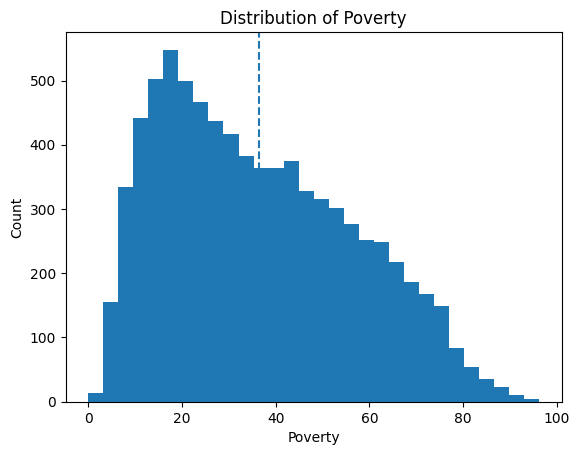

In [19]:
# Before converting Poverty into a binary variable, I examined its distribution. This helps understand whether poverty levels are skewed and whether using the mean as a threshold is reasonable.
plt.figure()
plt.hist(df_small["Poverty"], bins=30)
plt.axvline(df_small["Poverty"].mean(), linestyle="--")
plt.title("Distribution of Poverty")
plt.xlabel("Poverty")
plt.ylabel("Count")
plt.show()

* The distribution shows how poverty levels are spread across census tracts. The dashed line represents the mean poverty value used as the threshold for classification. This visualization confirms that the mean is a reasonable split point for defining high vs low poverty areas

# EDA PLOT 2 — Correlation with Poverty

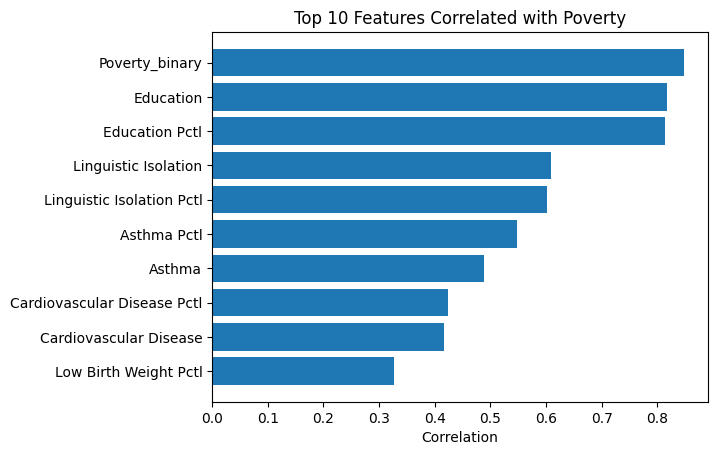

,Poverty
Poverty_binary,0.848725
Education,0.816521
Education Pctl,0.813998
Linguistic Isolation,0.609271
Linguistic Isolation Pctl,0.601953
Asthma Pctl,0.548239
Asthma,0.487867
Cardiovascular Disease Pctl,0.424221
Cardiovascular Disease,0.415957
Low Birth Weight Pctl,0.326023


In [20]:
# To better understand which environmental and health indicators are associated with poverty, I calculated the correlation between each feature and the continuous Poverty variable before converting it into binary form.
corr = df_small.corr(numeric_only=True)["Poverty"].sort_values(ascending=False)

# Remove Poverty itself from the list
corr = corr.drop("Poverty")

# Show top 10 strongest correlations
top_corr = corr.head(10)

plt.figure()
plt.barh(top_corr.index[::-1], top_corr.values[::-1])
plt.title("Top 10 Features Correlated with Poverty")
plt.xlabel("Correlation")
plt.show()

top_corr

* The correlation analysis shows which features are most strongly associated with poverty levels. This supports the modeling approach by confirming that environmental and health indicators contain meaningful predictive signal.

* Features with stronger correlations are likely to contribute more to the neural network’s ability to classify high-poverty census tracts

# Convert Poverty into a Binary Classification Target

1) The original Poverty variable is continuous. To convert this into a classification problem, I recode Poverty into a binary variable:

* 1 = Poverty above the mean (High Poverty)

* 0 = Poverty below or equal to the mean (Low Poverty)

* This allows the model to classify census tracts into economically vulnerable vs less vulnerable groups.

In [6]:

# Recode Poverty into binary target

# Calculate the mean poverty value
poverty_mean = df_small["Poverty"].mean()

print("Mean Poverty:", poverty_mean)

# Create a new binary target:
# 1 if Poverty is greater than the mean
# 0 otherwise
df_small["Poverty_binary"] = (df_small["Poverty"] > poverty_mean).astype(int)

# Check class balance
print("\nClass distribution:")
print(df_small["Poverty_binary"].value_counts())

Mean Poverty: 36.38678984414278

Class distribution:
Poverty_binary
0    4320
1    3636
Name: count, dtype: int64


### The mean poverty value is approximately 36.39. Census tracts with poverty above this value were labeled as 1 (High Poverty), and those below or equal to the mean were labeled as 0 (Low Poverty).

### The resulting class distribution is approximately 54% low poverty and 46% high poverty, which indicates a reasonably balanced dataset. No additional resampling techniques are required

# Separate X and y + 90/10 Split

In [7]:

#  Separate X and y and perform 90/10 split


# Separateing  features and target
X = df_small[X_cols]
y = df_small["Poverty_binary"]


SEED = 3220965

from sklearn.model_selection import train_test_split

# Perform 90/10 split and stratify to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.10,random_state=3220965,stratify=y)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

print("\nTraining class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest class distribution:")
print(y_test.value_counts(normalize=True))

Training set shape: (7160, 35)
Test set shape: (796, 35)

Training class distribution:
Poverty_binary
0    0.543017
1    0.456983
Name: proportion, dtype: float64

Test class distribution:
Poverty_binary
0    0.542714
1    0.457286
Name: proportion, dtype: float64


### The dataset was split into 90% training and 10% testing sets using a random seed equal to my student ID. Stratified sampling was used to preserve class balance in both partitions.

### The class distribution remains consistent across training and test so that the split was performed correctly.

# StandardScaler

In [9]:

# Scale the features


from sklearn.preprocessing import StandardScaler

# Creating  scaler
scaler = StandardScaler()

# Fiting  scaler only  on training data
X_train_scaled = scaler.fit_transform(X_train)

# Applying the  same transformation to test data
X_test_scaled = scaler.transform(X_test)


* Neural networks perform better when features are on similar scales. I used StandardScaler to standardize the features so that each variable has mean 0 and standard deviation 1.

* The scaler was fit only on the training data and then applied to the test data to prevent data leakage.

* The target variable was not scaled.

#Building  the Neural Network

*  In this step, I build a neural network using the Sequential API. The model includes two dense layers with ReLU activation and dropout layers to reduce overfitting.

* The output layer uses a sigmoid activation function since this is a binary classification problem.

* Early stopping is used to prevent overfitting and to restore the best model weights based on validation performance.

In [11]:


# Build Neural Network with explicit input shape


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.random.set_seed(SEED)

model = keras.Sequential([

    layers.Input(shape=(X_train_scaled.shape[1],)),

    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),

    layers.Dense(32, activation="relu"),
    layers.Dropout(0.3),

    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy", keras.metrics.AUC(name="auc")]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,417 (17.25 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)

# Training with Early Stopping

* I train the neural network for up to 100,000 epochs, but I use early stopping to automatically stop training when the validation loss stops improving. This helps avoid overfitting and restores the best model weights based on validation performance.

In [12]:

#  Training the  model with early stopping


early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",          # watch validation loss
    patience=10,                 # wait 10 epochs before stopping
    restore_best_weights=True    # bring back best weights
)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100000,
    batch_size=64,               # you can change to 32 or 128 if you want
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100000
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6383 - auc: 0.6749 - loss: 0.6365 - val_accuracy: 0.8405 - val_auc: 0.9156 - val_loss: 0.3660
Epoch 2/100000
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8334 - auc: 0.9073 - loss: 0.3853 - val_accuracy: 0.8505 - val_auc: 0.9273 - val_loss: 0.3414
Epoch 3/100000
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8485 - auc: 0.9229 - loss: 0.3512 - val_accuracy: 0.8518 - val_auc: 0.9294 - val_loss: 0.3366
Epoch 4/100000
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8570 - auc: 0.9257 - loss: 0.3450 - val_accuracy: 0.8606 - val_auc: 0.9302 - val_loss: 0.3352
Epoch 5/100000
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8574 - auc: 0.9299 - loss: 0.3338 - val_accuracy: 0.8543 - val_auc: 0.9299 - val_loss: 0.3355
Epoch 6/100000
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8595 - auc: 0.9328 - loss: 0.3256 - val_accuracy: 0.8530 - val_auc: 0.9296 - val_loss: 0.3357
Epoch 7/100000
1

In [13]:
print("Epochs trained:", len(history.history["loss"]))

Epochs trained: 22


# Learning Curves (Loss + Accuracy)

* I plotted training and validation loss/accuracy to see how the model learned over time. This helps check whether learning was stable and whether the model started to overfit

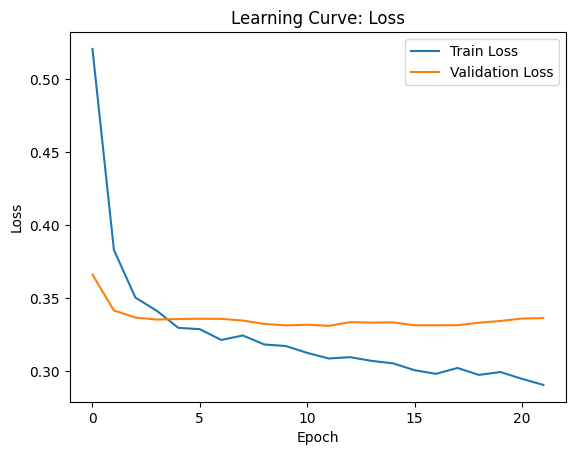

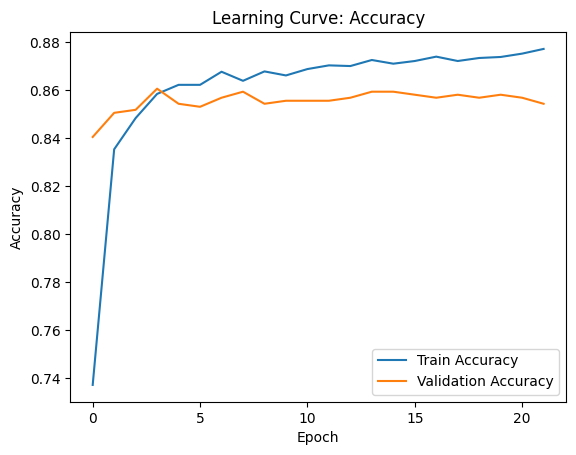

In [15]:
import matplotlib.pyplot as plt
# Learning curves: Loss
plt.figure()
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Learning Curve: Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Learning curves: Accuracy
plt.figure()
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Learning Curve: Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

* The training and validation loss both decreased rapidly during early epochs, indicating that the model quickly learned meaningful patterns in the data. After approximately 8–10 epochs, validation loss stabilized while training loss continued to decrease slightly.

* The small gap between training and validation accuracy suggests limited overfitting and good generalization performance. Early stopping successfully prevented unnecessary training beyond the point of improvement.

* Overall, the model learned smoothly and stabilized appropriately.

# Model Performance (Train vs Test)

* I evaluated model performance on both the training and test sets. I used confusion matrices and classification metrics to understand how well the model predicts high-poverty vs low-poverty census tracts and whether performance generalizes to unseen data

224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
TRAIN RESULTS
Accuracy: 0.880586592178771
AUC: 0.9490540293247608
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      3888
           1       0.89      0.84      0.87      3272

    accuracy                           0.88      7160
   macro avg       0.88      0.88      0.88      7160
weighted avg       0.88      0.88      0.88      7160



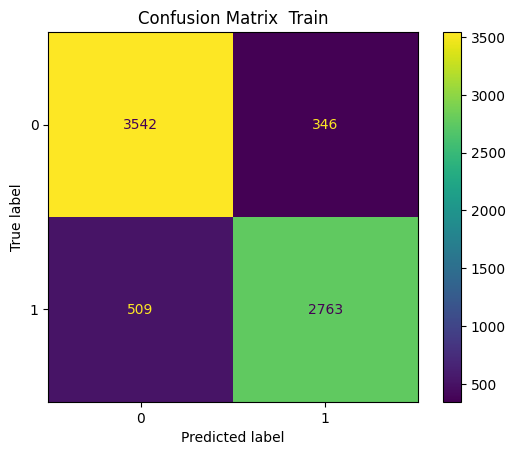


TEST RESULTS
Accuracy: 0.8555276381909548
AUC: 0.9313759157509157
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       432
           1       0.87      0.80      0.84       364

    accuracy                           0.86       796
   macro avg       0.86      0.85      0.85       796
weighted avg       0.86      0.86      0.85       796



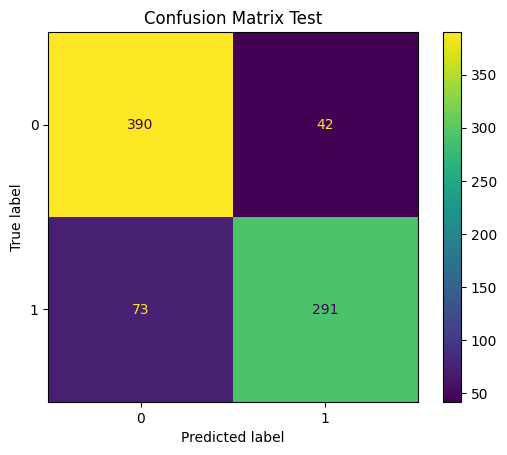

In [16]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
# Predicting  probabilities
train_probs = model.predict(X_train_scaled).ravel()
test_probs  = model.predict(X_test_scaled).ravel()

# Convert probabilities to class predictions using 0.5 threshold
train_pred = (train_probs >= 0.5).astype(int)
test_pred  = (test_probs  >= 0.5).astype(int)

# for training
print("TRAIN RESULTS")
print("Accuracy:", accuracy_score(y_train, train_pred))
print("AUC:", roc_auc_score(y_train, train_probs))
print(classification_report(y_train, train_pred))

cm_train = confusion_matrix(y_train, train_pred)
ConfusionMatrixDisplay(cm_train).plot()
plt.title("Confusion Matrix  Train")
plt.show()

# test
print("\nTEST RESULTS")
print("Accuracy:", accuracy_score(y_test, test_pred))
print("AUC:", roc_auc_score(y_test, test_probs))
print(classification_report(y_test, test_pred))

cm_test = confusion_matrix(y_test, test_pred)
ConfusionMatrixDisplay(cm_test).plot()
plt.title("Confusion Matrix Test")
plt.show()

* When I compare the training and test results, I see that training accuracy is about 88% and test accuracy is about 85.6%. The difference is around 2–3%, which is not very large.

* This shows that the model has learned useful patterns from the training data and is also performing well on unseen test data. There is a slight gap between training and test performance, which indicates mild overfitting, but it is not severe.

* From the learning curves, we can see that validation loss stabilizes after a few epochs, and early stopping prevents the model from training too long. Because of dropout and early stopping, overfitting is controlled.

* Overall, the model generalizes well and does not show strong overfitting.

# Baseline Model Comparison

### To evaluate whether the neural network provides meaningful improvement, I compare it to a simple baseline model. The baseline predicts the majority class for all observations.

### If the neural network performs significantly better than this baseline, it confirms that the model has learned useful patterns beyond simple guessing.

In [18]:
import numpy as np

#  Baseline model


# Find majority class in training data
majority_class = y_train.mode()[0]

# Create baseline predictions
baseline_train_pred = np.full_like(y_train, majority_class)
baseline_test_pred  = np.full_like(y_test, majority_class)

# Calculate baseline accuracy
baseline_train_acc = accuracy_score(y_train, baseline_train_pred)
baseline_test_acc  = accuracy_score(y_test, baseline_test_pred)

print("Baseline Train Accuracy:", baseline_train_acc)
print("Baseline Test Accuracy:", baseline_test_acc)

Baseline Train Accuracy: 0.5430167597765363
Baseline Test Accuracy: 0.542713567839196


The baseline model achieved approximately 54% accuracy by always predicting the majority class. In comparison, the neural network achieved approximately 85.6% accuracy on the test set.

This substantial improvement demonstrates that the neural network successfully learned meaningful relationships between environmental, health, and socioeconomic indicators and poverty classification.